# Autour du Paradoxe de Simpson

## Enoncé

En 1972-1974, à Whickham, une ville du nord-est de l'Angleterre, située à environ 6,5 kilomètres au sud-ouest de Newcastle upon Tyne, un sondage d'un sixième des électeurs a été effectué afin d'éclairer des travaux sur les maladies thyroïdiennes et cardiaques (Tunbridge et al. 1977). Une suite de cette étude a été menée vingt ans plus tard (Vanderpump et al. 1995). Certains des résultats avaient trait au tabagisme et cherchaient à savoir si les individus étaient toujours en vie lors de la seconde étude. Par simplicité, nous nous restreindrons aux femmes et parmi celles-ci aux 1314 qui ont été catégorisées comme "fumant actuellement" ou "n'ayant jamais fumé". Il y avait relativement peu de femmes dans le sondage initial ayant fumé et ayant arrêté depuis (162) et très peu pour lesquelles l'information n'était pas disponible (18). La survie à 20 ans a été déterminée pour l'ensemble des femmes du premier sondage.

1.Représentez dans un tableau le nombre total de femmes vivantes et décédées sur la période en fonction de leur habitude de tabagisme. Calculez dans chaque groupe (fumeuses / non fumeuses) le taux de mortalité (le rapport entre le nombre de femmes décédées dans un groupe et le nombre total de femmes dans ce groupe). Vous pourrez proposer une représentation graphique de ces données et calculer des intervalles de confiance si vous le souhaitez. En quoi ce résultat est-il surprenant ?

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
url="https://gitlab.inria.fr/learninglab/mooc-rr/mooc-rr-ressources/-/raw/master/module3/Practical_session/Subject6_smoking.csv?inline=false"
doc = pd.read_csv(url, encoding = 'iso-8859-1')
doc

Smoker Status   Age
0       Yes  Alive  21.0
1       Yes  Alive  19.3
2        No   Dead  57.5
3        No  Alive  47.1
4       Yes  Alive  81.4
5        No  Alive  36.8
6        No  Alive  23.8
7       Yes   Dead  57.5
8       Yes  Alive  24.8
9       Yes  Alive  49.5
10      Yes  Alive  30.0
11       No   Dead  66.0
12      Yes  Alive  49.2
13       No  Alive  58.4
14       No   Dead  60.6
15       No  Alive  25.1
16       No  Alive  43.5
17       No  Alive  27.1
18       No  Alive  58.3
19      Yes  Alive  65.7
20       No   Dead  73.2
21      Yes  Alive  38.3
22       No  Alive  33.4
23      Yes   Dead  62.3
24       No  Alive  18.0
25       No  Alive  56.2
26      Yes  Alive  59.2
27       No  Alive  25.8
28       No   Dead  36.9
29       No  Alive  20.2
...     ...    ...   ...
1284    Yes   Dead  36.0
1285    Yes  Alive  48.3
1286     No  Alive  63.1
1287     No  Alive  60.8
1288    Yes   Dead  39.3
1289     No  Alive  36.7
1290     No  Alive  63.8
1291     No   Dead  71.3
1292     No  Alive  57.7
1293     No  Alive  63.2
1294     No  Alive  46.6
1295    Yes   Dead  82.4
1296    Yes  Alive  38.3
1297    Yes  Alive  32.7
1298     No  Alive  39.7
1299    Yes   Dead  60.0
1300     No   Dead  71.0
1301     No  Alive  20.5
1302     No  Alive  44.4
1303    Yes  Alive  31.2
1304    Yes  Alive  47.8
1305    Yes  Alive  60.9
1306     No   Dead  61.4
1307    Yes  Alive  43.0
1308     No  Alive  42.1
1309    Yes  Alive  35.9
1310     No  Alive  22.3
1311    Yes   Dead  62.1
1312     No   Dead  88.6
1313     No  Alive  39.1

[1314 rows x 3 columns]

On vérifie l'existence de données nulles.

In [3]:
doc[doc.isnull().any(axis=1)]

Empty DataFrame
Columns: [Smoker, Status, Age]
Index: []

Comme il n'y en a pas, on peut passer à l'analyse.

Représentation dans un tableau, en fonction de leur habitude de tabagisme, le nombre de femmes vivantes et décédées.

In [4]:
df=doc.copy()
Data=[0,0,0,0]
def compte_stats(tab, ligne):
    index=0;
    #On regarde si la personne fume.
    if ligne.Smoker!="No":
        index=2
    #On regarde si la personne est vivante
    if ligne.Status!="Dead":
        index+=1
    #tab = [non-fumeur mort, non-fumeur vivant, fumeur mort, fumeur vivant]
    tab[index]+=1
for ligne in df.itertuples():
    compte_stats(Data, ligne)
Data

[230, 502, 139, 443]

On a donc dans le tableau intitulé Data respectivement, le nombre de Non-fumeurs décédés puis vivants puis le nombre de non-fumeurs décédés puis vivants. On peut maintenant passer à l'analyse.

Calculez dans chaque groupe (fumeuses / non fumeuses) le taux de mortalité (le rapport entre le nombre de femmes décédées dans un groupe et le nombre total de femmes dans ce groupe). Vous pourrez proposer une représentation graphique de ces données et calculer des intervalles de confiance si vous le souhaitez. En quoi ce résultat est-il surprenant ?

In [5]:
def diviser_data_fumeur(Data):
    return {"Alive":Data[1],"Dead":Data[0]},{"Alive":Data[3],"Dead":Data[2]}
Non_fumeur,Fumeur = diviser_data_fumeur(Data)
def taux_mortalite(data):
    return data["Dead"]/(data["Dead"]+data["Alive"])

<BarContainer object of 2 artists>

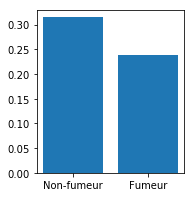

In [6]:
names = ['Non-fumeur', 'Fumeur']
values = [taux_mortalite(Non_fumeur),taux_mortalite(Fumeur)]
#print(values)

plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.bar(names, values)

Ce résultat est surprenant car il a été prouvé maintes fois que fumer nuit à la santé. Ce résultat est donc contre-intuitif.

2.Reprenez la question 1 (effectifs et taux de mortalité) en rajoutant une nouvelle catégorie liée à la classe d'âge. On considérera par exemple les classes suivantes : 18-34 ans, 34-54 ans, 55-64 ans, plus de 65 ans. En quoi ce résultat est-il surprenant ? Arrivez-vous à expliquer ce paradoxe ? De même, vous pourrez proposer une représentation graphique de ces données pour étayer vos explications.

In [7]:
def Separer_par_age(data):
    dic={"18-34":[],"35-54":[],"55-64":[],"65+":[]}
    for ligne in df.itertuples():
        age=ligne.Age
        if age>=65:
            dic["65+"].append(ligne)
        else:
            if age>=55 :
                dic["55-64"].append(ligne)
            else:
                if age>=35:
                    dic["35-54"].append(ligne)
                else:
                    dic["18-34"].append(ligne)
    return dic 

Pour chaque ligne, on vient l'ajouter à un tableau dans un dictionnaire. On viens ensuite faire la manipulation précédente sur chacune des clés dans le dictionnaire.

In [8]:
x=Separer_par_age(Data)
def recuperer_stats_age(Data):
    for i in Data.keys():
        temp=[0,0,0,0]
        for ligne in Data[i]:
            compte_stats(temp, ligne)
        Data[i]=diviser_data_fumeur(temp)
recuperer_stats_age(x)

On créée une fonction pour automatiser la séparation et récupération des données. On viens ensuite examiner chacune des tranches d'âge et afficher des graphes.

In [9]:
def taux_mortalite_par_age(data):
    tabnf=[]
    tabf=[]
    for i in data.keys():
        nf, f=data[i]
        tabnf.append(taux_mortalite(nf))
        tabf.append(taux_mortalite(f))
    return tabnf,tabf

In [11]:
tab_n_fum,tab_fum=taux_mortalite_par_age(x)

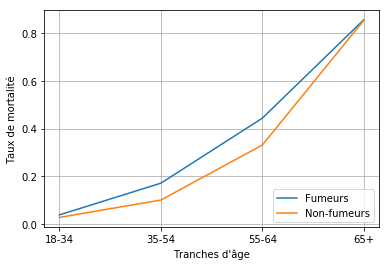

In [12]:
name = ["18-34","35-54","55-64","65+"]
                   
plt.plot(name, tab_fum, label = "Fumeurs") 
plt.plot(name, tab_n_fum, label = "Non-fumeurs") 
plt.xlabel("Tranches d'âge")
plt.ylabel("Taux de mortalité")
plt.grid()
plt.legend(loc='lower right')
plt.show()

Ce résultat est surprenant car il contredit les résultats précédents et place les fumeurs comme ayant le plus haut taux de mortalité. Lorsque le groupe est pris dans sa globalité, le résultat obtenu est différent de ceux que l'on obtient après avoir divisé le groupe en plusieurs sous-groupes. Je ne sais pas vraiment comment expliquer ce paradoxe. Il faudrait plus expérimenter avec les données.

3.Afin d'éviter un biais induit par des regroupements en tranches d'âges arbitraires et non régulières, il est envisageable d'essayer de réaliser une régression logistique. Si on introduit une variable Death valant 1 ou 0 pour indiquer si l'individu est décédé durant la période de 20 ans, on peut étudier le modèle Death ~ Age pour étudier la probabilité de décès en fonction de l'âge selon que l'on considère le groupe des fumeuses ou des non fumeuses. Ces régressions vous permettent-elles de conclure sur la nocivité du tabagisme ? Vous pourrez proposer une représentation graphique de ces régressions (en n'omettant pas les régions de confiance).

Je n'ai pas réussi à comprendre ce qu'est la regression logistique et à l'appliquer.